# ECG Classification

## PART 0 IMPORT LIBRARIES

In [5]:
import math
import random
import pickle
import itertools

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

from sklearn.utils import shuffle

from scipy.signal import resample

import matplotlib.pyplot as plt

np.random.seed(42)

import pickle
from sklearn.preprocessing import OneHotEncoder





In [6]:
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import math
import random
import pickle
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras





## PART 1 DATA ACQUISITION

In [8]:
import os
print(os.listdir()) # Print directories 


['__notebook_source__.ipynb', '.ipynb_checkpoints']


In [9]:
# Print directories in DATASET folder
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/heartbeat/ptbdb_abnormal.csv
../input/heartbeat/mitbih_train.csv
../input/heartbeat/mitbih_test.csv
../input/heartbeat/ptbdb_normal.csv
../input/ecgtest1/test1.txt
../input/arduinosamples/test1.txt


In [10]:
#BIH Arrhythmia Dataset
#Arrhythmia Dataset
#Number of Samples: 109446
#Number of Categories: 5
#Sampling Frequency: 125Hz
#Data Source: Physionet's MIT-BIH Arrhythmia Dataset
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

# catenate df and df2 together
mit_test_data = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)
mit_train_data = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
df = pd.read_csv("../input/heartbeat/mitbih_train.csv", header=None)
df2 = pd.read_csv("../input/heartbeat/mitbih_test.csv", header=None)
df = pd.concat([df, df2], axis=0) # Combines the two matrices
del df2
# Example of concat
#s1 = pd.Series(['a', 'b'],['c', 'd'])
#s2 = pd.Series(['e', 'f'],['k', 'l'])
#pd.concat([s1, s2], axis=0)
#c    a
#d    b
#k    e
#l    f

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


# ARDUINO SAMPLES

In [60]:
#test= pd.read_csv("../input/ecgtest1/test1.txt", header=None)
test= pd.read_csv("../input/arduinosamples/test1.txt", header=None)
test.info

<bound method DataFrame.info of           0    1
0         8  524
1        16  522
2        24  534
3        32  530
4        40  551
...     ...  ...
1786  19229  490
1787  19240  483
1788  19253  489
1789  19264  489
1790  19275  480

[1791 rows x 2 columns]>

Text(0.5, 0, 'ms')

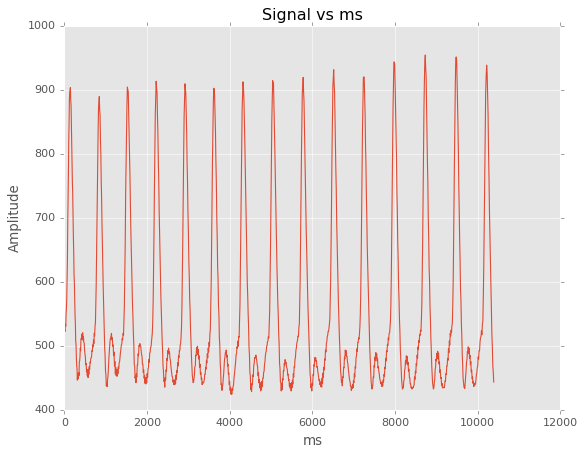

In [61]:
t1=0 #data point index
t2=1014 #data point index
plt.plot(test.iloc[t1:t2,0],test.iloc[t1:t2,1])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')

# Normalizing Samples

In [15]:
test[:][1]

0       524
1       522
2       534
3       530
4       551
       ... 
1786    490
1787    483
1788    489
1789    489
1790    480
Name: 1, Length: 1791, dtype: int64

Text(0.5, 0, 'data points')

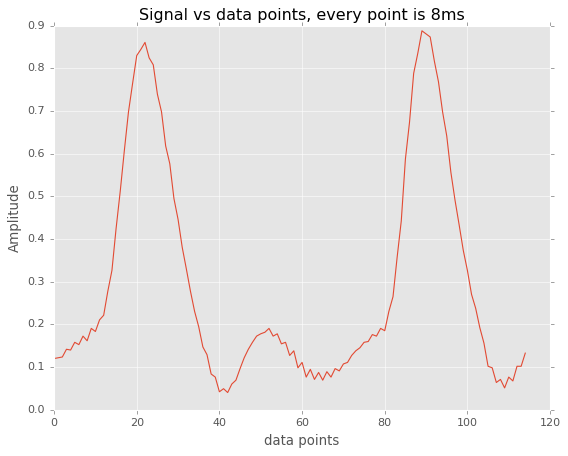

In [62]:
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)


t1=75
t2=190
plt.plot(normalized[t1:t2,1])
plt.title('Signal vs data points, every point is 8ms')
plt.ylabel('Amplitude')
plt.xlabel('data points')

In [17]:
dfnormalized = pd.DataFrame(normalized)
dfnormalized[1]

0       0.199275
1       0.195652
2       0.217391
3       0.210145
4       0.248188
          ...   
1786    0.137681
1787    0.125000
1788    0.135870
1789    0.135870
1790    0.119565
Name: 1, Length: 1791, dtype: float64

In [18]:
dfnormalized[0][:]

0       0.000000
1       0.000415
2       0.000830
3       0.001246
4       0.001661
          ...   
1786    0.997612
1787    0.998183
1788    0.998858
1789    0.999429
1790    1.000000
Name: 0, Length: 1791, dtype: float64

In [19]:
dfnormalized.index = [x for x in range(1, len(dfnormalized.values)+1)]

Text(0.5, 0, 'ms')

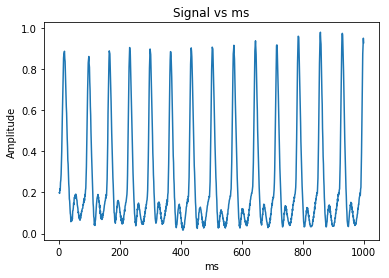

In [20]:
t1=0 #data point index
t2=1000 #data point index
plt.plot(dfnormalized.iloc[t1:t2,1])
plt.title('Signal vs ms')
plt.ylabel('Amplitude')
plt.xlabel('ms')

## EXPLORATORY DATA ANALYSIS

##  Show one data

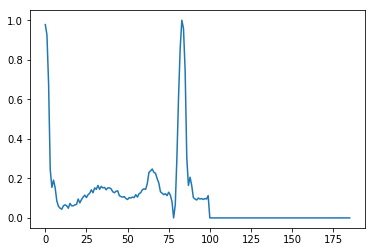

In [21]:
# show one data
plt.plot(mit_train_data.iloc[0,:186])

In [22]:
# Count column 187 values which are the indicators for diseases
equilibre=mit_train_data[187].value_counts()
print(equilibre)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


##  Distribution of categories 

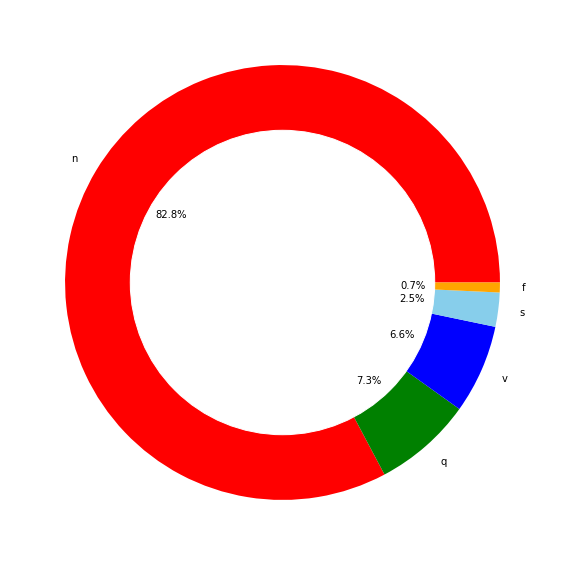

In [23]:
# M plot the circle of value counts in dataset
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## PRODUCE BALANCED DATASET train_df , test_df

In [24]:
# There is a huge difference in the balanced of the classes.
# Better choose the resample technique more than the class weights for the algorithms.
from sklearn.utils import resample

df_1=mit_train_data[mit_train_data[187]==1]
df_2=mit_train_data[mit_train_data[187]==2]
df_3=mit_train_data[mit_train_data[187]==3]
df_4=mit_train_data[mit_train_data[187]==4]
df_0=(mit_train_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=mit_test_data[mit_train_data[187]==1]
df_22=mit_test_data[mit_train_data[187]==2]
df_33=mit_test_data[mit_train_data[187]==3]
df_44=mit_test_data[mit_train_data[187]==4]
df_00=(mit_test_data[mit_train_data[187]==0]).sample(n=20000,random_state=42)

df_11_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_22_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_33_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_44_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [25]:
equilibre=train_df[187].value_counts()
print(equilibre)

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


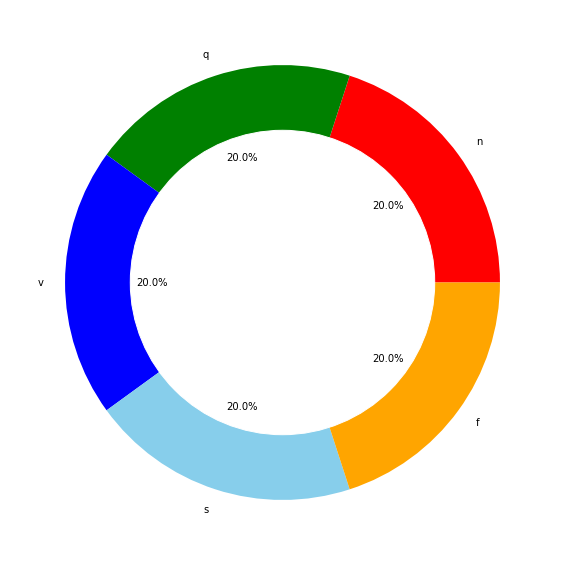

In [26]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [27]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((train_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


##  1-beat ECG for every category

In [28]:
M = mit_train_data.values
X = M[:, :-1]
y = M[:, -1].astype(int) # select last column values for all rows 

In [29]:
C0 = np.argwhere(y == 0).flatten() # Find the indices of array elements that are non-zero, grouped by element.
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

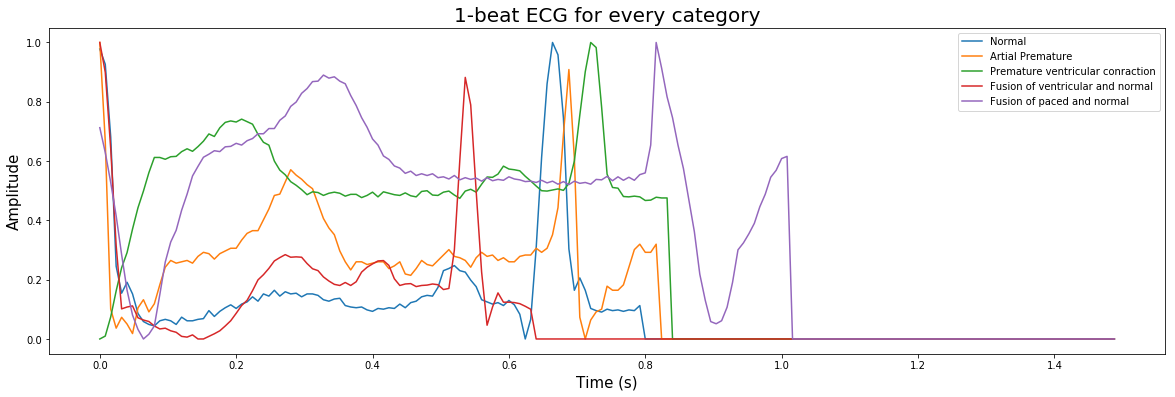

In [30]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,6))
plt.plot(x, X[C0, :][0], label="Normal") # select [0] i.e. first row of normal matrix
plt.plot(x, X[C1, :][0], label="Artial Premature")
plt.plot(x, X[C2, :][0], label="Premature ventricular conraction")
plt.plot(x, X[C3, :][0], label="Fusion of ventricular and normal")
plt.plot(x, X[C4, :][0], label="Fusion of paced and normal")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (s)", fontsize=15)
plt.show()

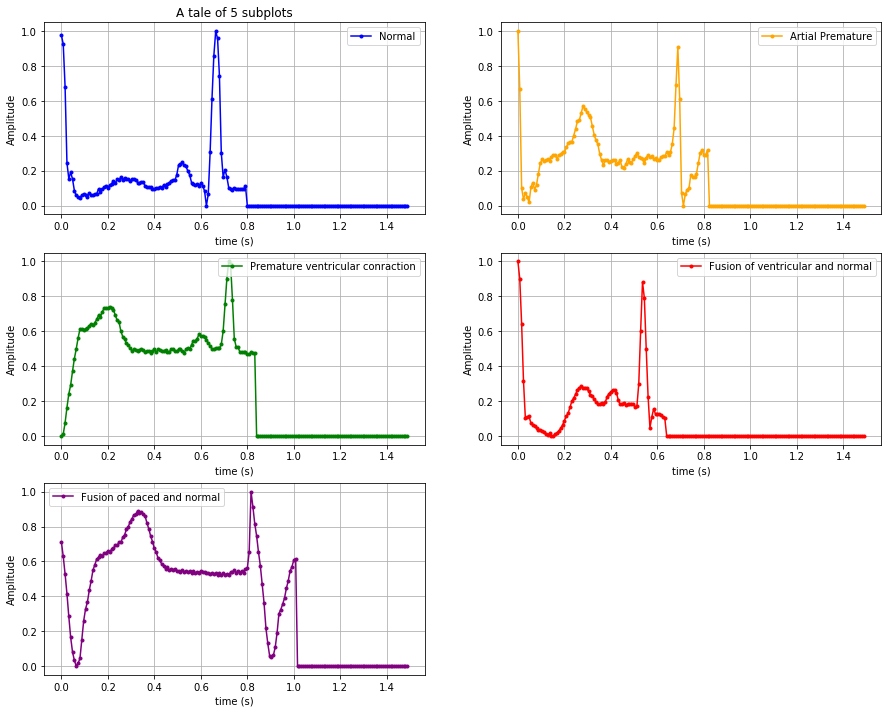

In [31]:
# A TALE of 5 subplots
x = np.arange(0, 187)*8/1000 #turn to ms 

plt.figure(figsize=(15,12))
# 9,12,4,123,23 for sample values
plt.subplot(3, 2, 1)

plt.plot(x, X[C0, :][0], '.-',color="blue", label="Normal")
plt.title('A tale of 5 subplots')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(x, X[C1, :][0], '.-',color="orange", label="Artial Premature")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 2, 3)
plt.plot(x, X[C2, :][0], '.-',color="green", label="Premature ventricular conraction")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(x, X[C3, :][0], '.-',color="red", label="Fusion of ventricular and normal")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 2, 5)

plt.plot(x, X[C4, :][0], '.-',color="purple",  label="Fusion of paced and normal")
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.show()

##  Take a random distribution

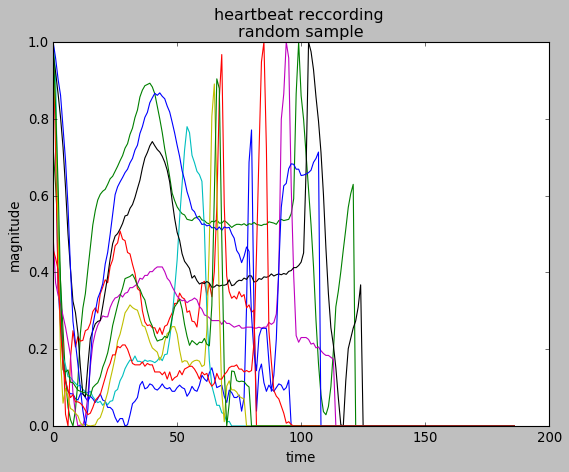

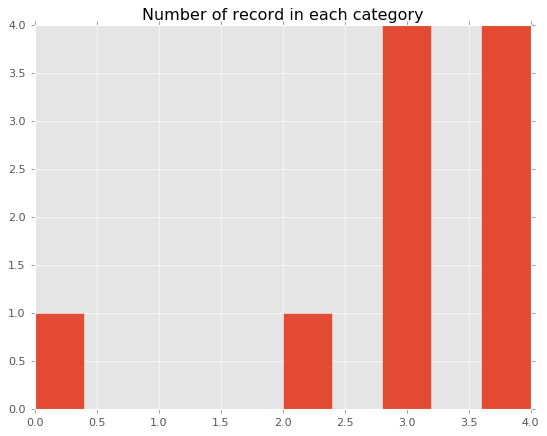

In [32]:
# take a random distribution from balanced database
sample = train_df.sample(10)#10 is number of sumples 
#sample = mit_train_data.sample(10)#10 is number of sumples

# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]

import matplotlib.pyplot as plt

plt.style.use('classic')

# plt samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("heartbeat reccording \nrandom sample")

plt.show()

plt.style.use("ggplot")

plt.title("Number of record in each category")

plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

## STUDY THE CATEGORIES

In [33]:
#  take one sample per class and store it in a dataframe in order to have an exmeple.
c=mit_train_data.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(10))

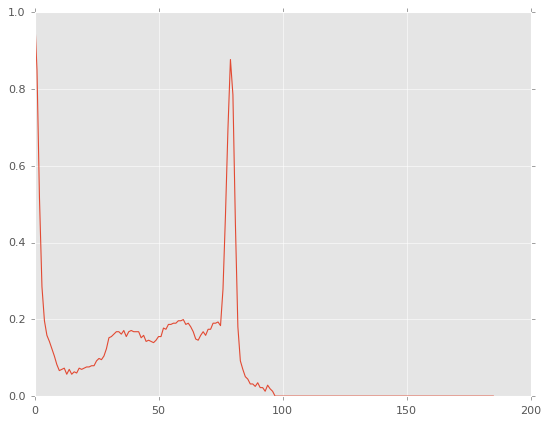

In [34]:
 plt.plot(c.iloc[1,:186]) #A normal signal from sample c

In [35]:
# A representation for all the class. 
# We take all the signal and map them. 
# Like that we have an estimation what the signal can look like.

# min_ = Minimum value of x 
# size = Maximum value of x


def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()
    

1300000
1300000


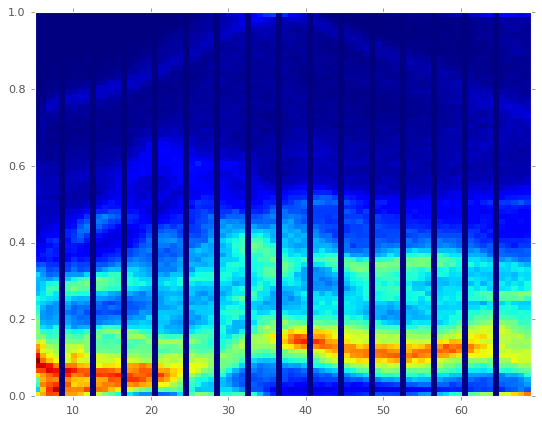

In [36]:
plot_hist(0,70,5)

## ADDING NOISE TO SIGNAL

In [37]:
# function that adds noise
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

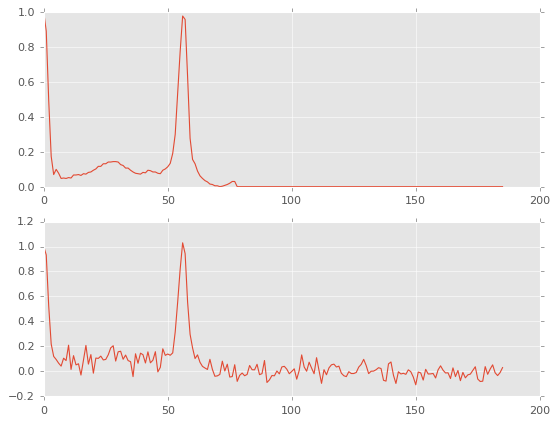

In [38]:
# Collect one sample 
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
tempo=c.iloc[0,:186]

# Add noise to the sample 
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

## ONE HOT ENCODING

In [39]:
mit_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [73]:
#One hot encoding for categorical target
#Since we will be using neural networks for our classification model, 
#our output classes need to be turned into a numerical representation. We use one hot encoding (from sklearn package) to do this.



#train_target = mit_train_data[187]
#train_target = train_target.values.reshape(87554,1)
train_target = train_df[187]
train_target = train_target.values.reshape(100000,1)




#one hot encode train_target

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train_target)

# 3. Transform
onehotlabels = enc.transform(train_target).toarray()
onehotlabels.shape

target = onehotlabels

In [74]:
# Now our classes change from "0", "1", etc. to a vector of 0s and 1s shown below.
target[0]

array([1., 0., 0., 0., 0.])

In [42]:
## Split training data 75:25 into a training set and validation set. 

In [75]:
#remove ground truth labels from training df
#train/test split


from sklearn.model_selection import train_test_split

#X = mit_train_data
X = train_df
X = X.drop(axis=1,columns=187)

X_train, X_valid, Y_train, Y_valid = train_test_split(X,target, test_size = 0.25, random_state = 36)
X_train = np.asarray(X_train)
X_valid = np.asarray(X_valid)
Y_train = np.asarray(Y_train)
Y_valid = np.asarray(Y_valid)

#X_train.reshape((1, 2403, 187))
X_train = np.expand_dims(X_train, axis=2)
X_valid = np.expand_dims(X_valid, axis=2)
print(X_train.shape)
print(Y_train.shape)
# 2,403 training heartbeats and 802 validation heartbeats 
# for a 75:25 train-test split. 


(75000, 187, 1)
(75000, 5)


## MODEL

In [44]:
# MODEL 1 https://www.kaggle.com/freddycoder/heartbeat-categorization

In [76]:
# Separate features and targets

from keras.utils import to_categorical

print("--- X ---")
# X = mit_train_data.loc[:, mit_train_data.columns != 187]
X = train_df.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
# y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = train_df.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
#testX = mit_test_data.loc[:, mit_test_data.columns != 187]
testX = test_df.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
#testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = test_df.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
            0         1         2         3         4         5         6    \
10153  0.162791  0.540698  0.755814  0.186047  0.168605  0.546512  0.616279   
33886  0.990066  0.938742  0.344371  0.034768  0.273179  0.331126  0.326159   
32005  0.974239  0.932084  0.590164  0.131148  0.014052  0.168618  0.238876   
56159  0.978495  0.723118  0.526882  0.298387  0.220430  0.158602  0.091398   
61783  0.963351  0.709424  0.060209  0.013089  0.057592  0.041885  0.047120   

            7         8         9    ...  177  178  179  180  181  182  183  \
10153  0.697674  0.651163  0.703488  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33886  0.341060  0.347682  0.347682  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32005  0.210773  0.196721  0.208431  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
56159  0.091398  0.080645  0.083333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
61783  0.034031  0.039267  0.044503  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
10153  0.0  0.0  

In [77]:
# Keras model to make prediction
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10)

print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Epoch 1/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.4725 - accuracy: 0.8282
Epoch 2/100
100000/100000 [==============================] - 5s 52us/step - loss: 0.2876 - accuracy: 0.8956
Epoch 3/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.2317 - accuracy: 0.9179
Epoch 4/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.1976 - accuracy: 0.9319
Epoch 5/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.1755 - accuracy: 0.9393
Epoch 6/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.1557 - accuracy: 0.9464
Epoch 7/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.1407 - accuracy: 0.9520
Epoch 8/100
100000/100000 [==============================] - 5s 55us/step - loss: 0.1274 - accuracy: 0.9562
Epoch 9/100
100000/100000 [==============================] - 5s 55us/step - loss: 0.1169 - accuracy: 0.9600
Epoch 10/100
100000/100000 [

100000/100000 [==============================] - 5s 54us/step - loss: 0.0199 - accuracy: 0.9938
Epoch 77/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.0198 - accuracy: 0.9937
Epoch 78/100
100000/100000 [==============================] - 5s 54us/step - loss: 0.0214 - accuracy: 0.9931
Epoch 79/100
100000/100000 [==============================] - 6s 61us/step - loss: 0.0192 - accuracy: 0.9941
Epoch 80/100
100000/100000 [==============================] - 5s 52us/step - loss: 0.0199 - accuracy: 0.9937
Epoch 81/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.0208 - accuracy: 0.9935
Epoch 82/100
100000/100000 [==============================] - 5s 52us/step - loss: 0.0198 - accuracy: 0.9938
Epoch 83/100
100000/100000 [==============================] - 5s 52us/step - loss: 0.0198 - accuracy: 0.9938
Epoch 84/100
100000/100000 [==============================] - 5s 53us/step - loss: 0.0190 - accuracy: 0.9943
Epoch 85/100
100000/100000 [====

# PREDICTION OF MODEL WITH ARDUINO SAMPLE AS INPUT

In [78]:
ytest= pd.DataFrame()
ytest=ytest.dropna()
normalized = pd.DataFrame(normalized)
lst_seq = np.arange(0,len(normalized)-190)
for x in lst_seq:
    normtest=normalized.loc[ 0+x:186+x,1]
    normtest = pd.DataFrame(normtest).transpose()
    normtest
    ytest[x] = model.predict_classes(normtest)
print(len(normalized)-190)

1601


## MEAN OF CATEGORIES

In [79]:
np.mean(ytest.transpose())

0    1.220487
dtype: float64

## PLOT OF CATEGORIES

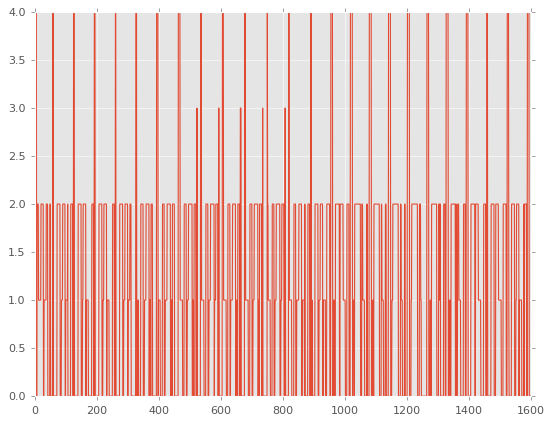

In [80]:
plt.plot(ytest.transpose())

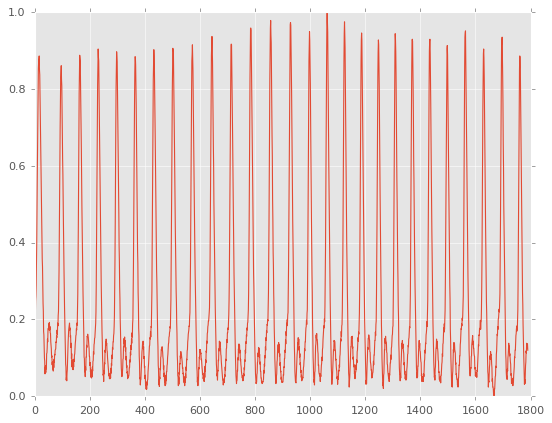

In [81]:
plt.plot(normalized.loc[:,1])